# DSC 48 Lead Scoring Case Study

## Problem Statement
An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. The company markets its courses on several websites and search engines like Google. 

Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. 

Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%.

# Business Goals
To select the most promising leads, i.e. the leads that are most likely to convert into paying customers. 
Build a model wherein a lead score needs to be assigned to each lead such that the customers with a higher lead score have a higher conversion chance and the customers with a lower lead score have a lower conversion chance. 
A ballpark of the target lead conversion rate to be around 80% has been given.

In [298]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [299]:
leads=pd.read_csv('Leads.csv')

In [300]:
leadswithoutduplicate = leads.copy()

# Checking for duplicates and dropping the entire duplicate row if any
leadswithoutduplicate.drop_duplicates(subset=None, inplace=True)
leadswithoutduplicate.shape

(9240, 37)

In [301]:
leadswithoutduplicate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [302]:
# Percentage of null values of null value
round(100*(leadswithoutduplicate.isnull().sum())/len(leadswithoutduplicate.index),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

## Data Cleaning-Missing Values and Outliers

In [303]:
# Dropping columns with more than 40 percent missing values
leadswithoutduplicate.drop(columns=['Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score','Lead Quality'],axis=1,inplace=True)

In [304]:
# Dropping lead number as it is not important for the analysis
leadswithoutduplicate.drop(columns=['Lead Number'],axis=1,inplace=True)

In [305]:
# Filling missing values with np Nan or not provided in categorical variables
leadswithoutduplicate['Specialization'] = leadswithoutduplicate['Specialization'].fillna('not provided')
leadswithoutduplicate['City'] = leadswithoutduplicate['City'].fillna('not provided')
leadswithoutduplicate['Tags'] = leadswithoutduplicate['Tags'].fillna('not provided')
leadswithoutduplicate['What matters most to you in choosing a course'] = leadswithoutduplicate['What matters most to you in choosing a course'].fillna('not provided')
leadswithoutduplicate['What is your current occupation'] = leadswithoutduplicate['What is your current occupation'].fillna('not provided')
leadswithoutduplicate['Last Activity'] = leadswithoutduplicate['Last Activity'].fillna('not provided')
leadswithoutduplicate['Country'] = leadswithoutduplicate['Country'].fillna('not provided')
leadswithoutduplicate['TotalVisits'] = leadswithoutduplicate['TotalVisits'].fillna(np.NaN)
leadswithoutduplicate['Page Views Per Visit'] = leadswithoutduplicate['Page Views Per Visit'].fillna(np.NaN)
leadswithoutduplicate['Lead Source'] = leadswithoutduplicate['Lead Source'].fillna('not provided')

In [306]:
leadswithoutduplicate['Last Activity'].value_counts(normalize=True)

Email Opened                    0.371970
SMS Sent                        0.297078
Olark Chat Conversation         0.105303
Page Visited on Website         0.069264
Converted to Lead               0.046320
Email Bounced                   0.035281
Email Link Clicked              0.028896
Form Submitted on Website       0.012554
not provided                    0.011147
Unreachable                     0.010065
Unsubscribed                    0.006602
Had a Phone Conversation        0.003247
Approached upfront              0.000974
View in browser link Clicked    0.000649
Email Received                  0.000216
Email Marked Spam               0.000216
Visited Booth in Tradeshow      0.000108
Resubscribed to emails          0.000108
Name: Last Activity, dtype: float64

In [307]:
# Imputing missing values with mode
leadswithoutduplicate['Last Activity']=leadswithoutduplicate['Last Activity'].replace('not provided','Email Opened')

In [308]:
leadswithoutduplicate['Country'].value_counts(normalize=True)

India                   0.702597
not provided            0.266342
United States           0.007468
United Arab Emirates    0.005736
Singapore               0.002597
Saudi Arabia            0.002273
United Kingdom          0.001623
Australia               0.001407
Qatar                   0.001082
Bahrain                 0.000758
Hong Kong               0.000758
Oman                    0.000649
France                  0.000649
unknown                 0.000541
Kuwait                  0.000433
South Africa            0.000433
Canada                  0.000433
Nigeria                 0.000433
Germany                 0.000433
Sweden                  0.000325
Philippines             0.000216
Uganda                  0.000216
Italy                   0.000216
Bangladesh              0.000216
Netherlands             0.000216
Asia/Pacific Region     0.000216
China                   0.000216
Belgium                 0.000216
Ghana                   0.000216
Kenya                   0.000108
Sri Lanka 

In [309]:
# Imputing missing values with mode
leadswithoutduplicate['Country']=leadswithoutduplicate['Country'].replace('not provided','India')

In [310]:
leadswithoutduplicate['City'].value_counts(normalize=True)

Mumbai                         0.348701
Select                         0.243398
not provided                   0.153680
Thane & Outskirts              0.081385
Other Cities                   0.074242
Other Cities of Maharashtra    0.049459
Other Metro Cities             0.041126
Tier II Cities                 0.008009
Name: City, dtype: float64

In [311]:
# Considering Select as a missing value
leadswithoutduplicate['City']=leadswithoutduplicate['City'].replace('Select','not provided')

In [312]:
leadswithoutduplicate['City'].value_counts(normalize=True)

not provided                   0.397078
Mumbai                         0.348701
Thane & Outskirts              0.081385
Other Cities                   0.074242
Other Cities of Maharashtra    0.049459
Other Metro Cities             0.041126
Tier II Cities                 0.008009
Name: City, dtype: float64

In [313]:
# Dropping Country due to only one category being present, dropping City due to 40% missing values
leadswithoutduplicate.drop(['City','Country'],axis=1,inplace=True)

In [314]:
leadswithoutduplicate['Lead Origin'].value_counts(normalize=True)

Landing Page Submission    0.528788
API                        0.387446
Lead Add Form              0.077706
Lead Import                0.005952
Quick Add Form             0.000108
Name: Lead Origin, dtype: float64

In [315]:
leadswithoutduplicate['Lead Source'].value_counts(normalize=True)

Google               0.310390
Direct Traffic       0.275216
Olark Chat           0.189935
Organic Search       0.124892
Reference            0.057792
Welingak Website     0.015368
Referral Sites       0.013528
Facebook             0.005952
not provided         0.003896
bing                 0.000649
google               0.000541
Click2call           0.000433
Press_Release        0.000216
Social Media         0.000216
Live Chat            0.000216
youtubechannel       0.000108
testone              0.000108
Pay per Click Ads    0.000108
welearnblog_Home     0.000108
WeLearn              0.000108
blog                 0.000108
NC_EDM               0.000108
Name: Lead Source, dtype: float64

In [316]:
leadswithoutduplicate['Lead Source']=leadswithoutduplicate['Lead Source'].replace('google','Google')

In [317]:
# Imputing missing values with mode
leadswithoutduplicate['Lead Source']=leadswithoutduplicate['Lead Source'].replace('not provided','Google')

In [318]:
leadswithoutduplicate['Do Not Email'].value_counts(normalize=True)

No     0.920563
Yes    0.079437
Name: Do Not Email, dtype: float64

In [319]:
leadswithoutduplicate['Do Not Call'].value_counts(normalize=True)

No     0.999784
Yes    0.000216
Name: Do Not Call, dtype: float64

In [320]:
leadswithoutduplicate['Specialization'].value_counts(normalize=True)

Select                               0.210173
not provided                         0.155628
Finance Management                   0.105628
Human Resource Management            0.091775
Marketing Management                 0.090693
Operations Management                0.054437
Business Administration              0.043615
IT Projects Management               0.039610
Supply Chain Management              0.037771
Banking, Investment And Insurance    0.036580
Travel and Tourism                   0.021970
Media and Advertising                0.021970
International Business               0.019264
Healthcare Management                0.017208
Hospitality Management               0.012338
E-COMMERCE                           0.012121
Retail Management                    0.010823
Rural and Agribusiness               0.007900
E-Business                           0.006169
Services Excellence                  0.004329
Name: Specialization, dtype: float64

In [321]:
# Considering missing values as a category of No Information
leadswithoutduplicate['Specialization']=leadswithoutduplicate['Specialization'] = leadswithoutduplicate['Specialization'].replace(['Select','not provided'] ,'No Information')  

In [322]:
#Combining various management specialisation into one category management specialisation
leadswithoutduplicate['Specialization']=leadswithoutduplicate['Specialization'] = leadswithoutduplicate['Specialization'].replace(['Finance Management','Human Resource Management','Marketing Management','Operations Management','IT Projects Management','Supply Chain Management','Healthcare Management','Hospitality Management','Retail Management'] ,'Management Specializations')  

In [323]:
leadswithoutduplicate['Specialization'].value_counts(normalize=True)
# Not imputing missing values as they could indicate a specialisation not in the list hence user has not selected or the student has not chosen any specialisation

Management Specializations           0.460281
No Information                       0.365801
Business Administration              0.043615
Banking, Investment And Insurance    0.036580
Media and Advertising                0.021970
Travel and Tourism                   0.021970
International Business               0.019264
E-COMMERCE                           0.012121
Rural and Agribusiness               0.007900
E-Business                           0.006169
Services Excellence                  0.004329
Name: Specialization, dtype: float64

In [324]:
leadswithoutduplicate['Last Notable Activity'].value_counts(normalize=True)

Modified                        0.368723
Email Opened                    0.305952
SMS Sent                        0.235065
Page Visited on Website         0.034416
Olark Chat Conversation         0.019805
Email Link Clicked              0.018723
Email Bounced                   0.006494
Unsubscribed                    0.005087
Unreachable                     0.003463
Had a Phone Conversation        0.001515
Email Marked Spam               0.000216
Approached upfront              0.000108
Resubscribed to emails          0.000108
View in browser link Clicked    0.000108
Form Submitted on Website       0.000108
Email Received                  0.000108
Name: Last Notable Activity, dtype: float64

In [325]:
# Combining low frequency categories into one category others
leadswithoutduplicate['Last Notable Activity'] = leadswithoutduplicate['Last Notable Activity'].replace(['Had a Phone Conversation','Approached upfront','View in browser link Clicked','Email Received','Email Marked Spam','Visited Booth in Tradeshow','Resubscribed to emails','Form Submitted on Website'],'Others') 

In [326]:
leadswithoutduplicate['What is your current occupation'].value_counts(normalize=True)

Unemployed              0.606061
not provided            0.291126
Working Professional    0.076407
Student                 0.022727
Other                   0.001732
Housewife               0.001082
Businessman             0.000866
Name: What is your current occupation, dtype: float64

In [327]:
# Imputing missing values with mode
leadswithoutduplicate['What is your current occupation'] = leadswithoutduplicate['What is your current occupation'].replace(['not provided'],'Unemployed') 

In [328]:
leadswithoutduplicate['What matters most to you in choosing a course'].value_counts(normalize=True)

Better Career Prospects      0.706494
not provided                 0.293182
Flexibility & Convenience    0.000216
Other                        0.000108
Name: What matters most to you in choosing a course, dtype: float64

In [329]:
# Imputing missing values with mode
leadswithoutduplicate['What matters most to you in choosing a course'] = leadswithoutduplicate['What matters most to you in choosing a course'].replace(['not provided'],'Better Career Prospects') 

In [330]:
leadswithoutduplicate['Search'].value_counts(normalize=True)

No     0.998485
Yes    0.001515
Name: Search, dtype: float64

In [331]:
leadswithoutduplicate['Magazine'].value_counts(normalize=True)

No    1.0
Name: Magazine, dtype: float64

In [332]:
leadswithoutduplicate['Newspaper Article'].value_counts(normalize=True)

No     0.999784
Yes    0.000216
Name: Newspaper Article, dtype: float64

In [333]:
leadswithoutduplicate['X Education Forums'].value_counts(normalize=True)

No     0.999892
Yes    0.000108
Name: X Education Forums, dtype: float64

In [334]:
leadswithoutduplicate['Digital Advertisement'].value_counts(normalize=True)

No     0.999567
Yes    0.000433
Name: Digital Advertisement, dtype: float64

In [335]:
leadswithoutduplicate['Through Recommendations'].value_counts(normalize=True)

No     0.999242
Yes    0.000758
Name: Through Recommendations, dtype: float64

In [336]:
leadswithoutduplicate['Receive More Updates About Our Courses'].value_counts(normalize=True)

No    1.0
Name: Receive More Updates About Our Courses, dtype: float64

In [337]:
leadswithoutduplicate['Tags'].value_counts(normalize=True)

not provided                                         0.362879
Will revert after reading the email                  0.224242
Ringing                                              0.130195
Interested in other courses                          0.055519
Already a student                                    0.050325
Closed by Horizzon                                   0.038745
switched off                                         0.025974
Busy                                                 0.020130
Lost to EINS                                         0.018939
Not doing further education                          0.015693
Interested  in full time MBA                         0.012662
Graduation in progress                               0.012013
invalid number                                       0.008983
Diploma holder (Not Eligible)                        0.006818
wrong number given                                   0.005087
opp hangup                                           0.003571
number n

In [338]:
leadswithoutduplicate['Tags'] = leadswithoutduplicate['Tags'].replace(['switched off','Already a student','Not doing further education','invalid number','wrong number given','Interested  in full time MBA','In confusion whether part time or DLP', 'in touch with EINS','Diploma holder (Not Eligible)','Approached upfront','Graduation in progress','number not provided', 'opp hangup','Still Thinking','Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch','Recognition issue (DEC approval)','Want to take admission but has financial problems','University not recognized'], 'Other_Tags')

In [339]:
leadswithoutduplicate['Tags'] = leadswithoutduplicate['Tags'].replace(['not provided'], 'Not Specified')

In [340]:
leadswithoutduplicate['Tags'].value_counts(normalize=True)

Not Specified                          0.362879
Will revert after reading the email    0.224242
Other_Tags                             0.149351
Ringing                                0.130195
Interested in other courses            0.055519
Closed by Horizzon                     0.038745
Busy                                   0.020130
Lost to EINS                           0.018939
Name: Tags, dtype: float64

In [341]:
leadswithoutduplicate['Update me on Supply Chain Content'].value_counts(normalize=True)

No    1.0
Name: Update me on Supply Chain Content, dtype: float64

In [342]:
leadswithoutduplicate['Get updates on DM Content'].value_counts(normalize=True)

No    1.0
Name: Get updates on DM Content, dtype: float64

In [343]:
leadswithoutduplicate['Lead Profile'].value_counts(normalize=True)

Select                         0.634819
Potential Lead                 0.246976
Other Leads                    0.074567
Student of SomeSchool          0.036901
Lateral Student                0.003675
Dual Specialization Student    0.003062
Name: Lead Profile, dtype: float64

In [344]:
leadswithoutduplicate['I agree to pay the amount through cheque'].value_counts(normalize=True)

No    1.0
Name: I agree to pay the amount through cheque, dtype: float64

In [345]:
leadswithoutduplicate['A free copy of Mastering The Interview'].value_counts(normalize=True)

No     0.687446
Yes    0.312554
Name: A free copy of Mastering The Interview, dtype: float64

In [346]:
leadswithoutduplicate['Last Notable Activity'].value_counts(normalize=True)

Modified                   0.368723
Email Opened               0.305952
SMS Sent                   0.235065
Page Visited on Website    0.034416
Olark Chat Conversation    0.019805
Email Link Clicked         0.018723
Email Bounced              0.006494
Unsubscribed               0.005087
Unreachable                0.003463
Others                     0.002273
Name: Last Notable Activity, dtype: float64

In [347]:
leadswithoutduplicate['How did you hear about X Education'].value_counts(normalize=True)

Select                   0.717048
Online Search            0.114887
Word Of Mouth            0.049481
Student of SomeSchool    0.044078
Other                    0.026447
Multiple Sources         0.021612
Advertisements           0.009953
Social Media             0.009527
Email                    0.003697
SMS                      0.003270
Name: How did you hear about X Education, dtype: float64

In [348]:
# Dropping these values as they contain values belonging to one category
leadswithoutduplicate.drop(['Magazine', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 
                          'Get updates on DM Content', 'I agree to pay the amount through cheque'], axis=1,inplace=True)

In [349]:
leadswithoutduplicate['Lead Profile'].value_counts(normalize=True)

Select                         0.634819
Potential Lead                 0.246976
Other Leads                    0.074567
Student of SomeSchool          0.036901
Lateral Student                0.003675
Dual Specialization Student    0.003062
Name: Lead Profile, dtype: float64

In [350]:
#Dropping these columns as they contain 40% or more missing values
leadswithoutduplicate.drop(['Lead Profile','How did you hear about X Education'], axis=1,inplace=True)

In [351]:
leadswithoutduplicate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9240 entries, 0 to 9239
Data columns (total 22 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Origin                                    9240 non-null   object 
 2   Lead Source                                    9240 non-null   object 
 3   Do Not Email                                   9240 non-null   object 
 4   Do Not Call                                    9240 non-null   object 
 5   Converted                                      9240 non-null   int64  
 6   TotalVisits                                    9103 non-null   float64
 7   Total Time Spent on Website                    9240 non-null   int64  
 8   Page Views Per Visit                           9103 non-null   float64
 9   Last Activity                                  9240 

In [352]:
# Checking for outliers
leadswithoutduplicate.describe([.25,.5,.75,.90,.95,.99])

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9103.000000,9240.000000,9103.000000
mean,0.385390,3.445238,487.698268,2.362820
std,0.486714,4.854853,548.021466,2.161418
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,12.000000,1.000000
50%,0.000000,3.000000,248.000000,2.000000
75%,1.000000,5.000000,936.000000,3.000000
90%,1.000000,7.000000,1380.000000,5.000000
95%,1.000000,10.000000,1562.000000,6.000000
99%,1.000000,17.000000,1840.610000,9.000000


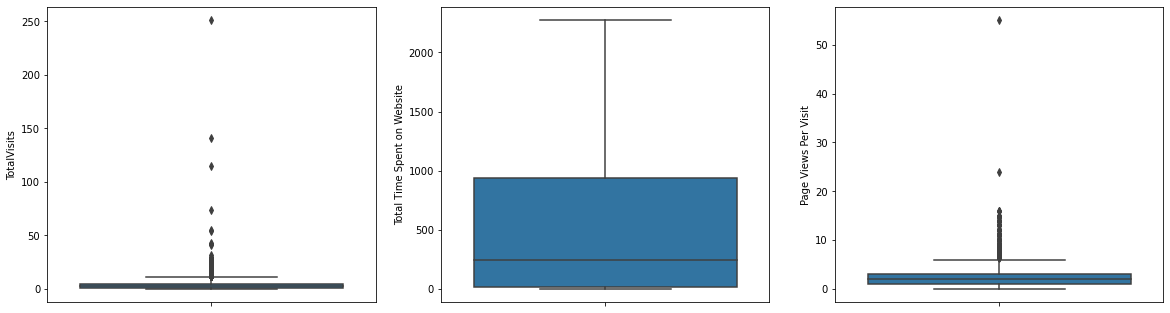

In [353]:
#Checking for outliers among numerical variables
plt.figure(figsize=(20, 25))
plt.subplot(4,3,1)
sns.boxplot(y = 'TotalVisits',  data = leadswithoutduplicate)
plt.subplot(4,3,2)
sns.boxplot(y = 'Total Time Spent on Website', data = leadswithoutduplicate)
plt.subplot(4,3,3)
sns.boxplot(y = 'Page Views Per Visit',  data = leadswithoutduplicate)
plt.show()
# Outlier observed in the case of TotalVisits and Page Views Per Visit

In [354]:
# Due to the presence of outliers missing values have been imputed with the median
leadswithoutduplicate['TotalVisits'] = leadswithoutduplicate['TotalVisits'].replace(np.NaN, leadswithoutduplicate['TotalVisits'].median())

In [355]:
leadswithoutduplicate['Page Views Per Visit'] = leadswithoutduplicate['Page Views Per Visit'].replace(np.NaN, leadswithoutduplicate['Page Views Per Visit'].median())

# Exploratory Data Analysis

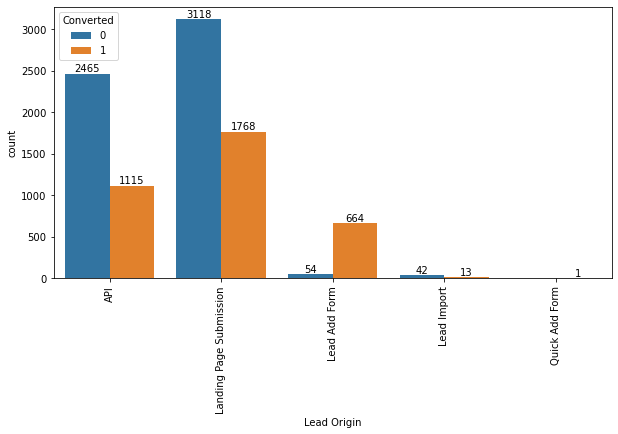

In [356]:
# Lead Origin 
plt.figure(figsize=(10,5))
b1=sns.countplot(leadswithoutduplicate['Lead Origin'], hue=leadswithoutduplicate.Converted)
b1.set_xticklabels(b1.get_xticklabels(),rotation=90)
for label in b1.containers:
    b1.bar_label(label)
plt.show()
#maximum conversion has been observed in the case of  Landing Page Submission.

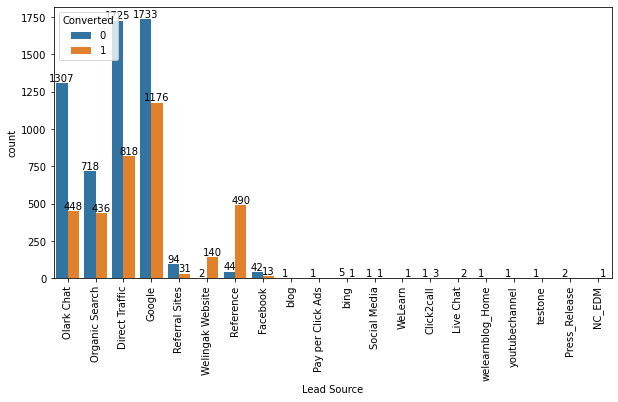

In [357]:
# Lead Source
plt.figure(figsize=(10,5))
c1=sns.countplot(leadswithoutduplicate['Lead Source'], hue=leadswithoutduplicate.Converted)
c1.set_xticklabels(c1.get_xticklabels(),rotation=90)
for label in c1.containers:
    c1.bar_label(label)
plt.show()
#maximum conversion has been observed in the case of Google

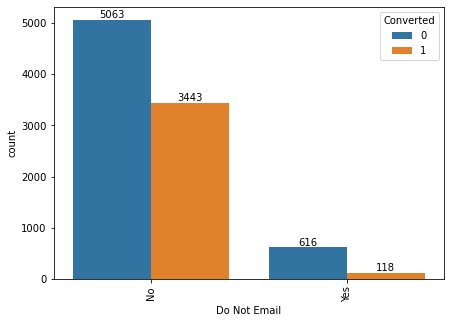

In [358]:
# Do Not Email
plt.figure(figsize=(7,5))
d1=sns.countplot(leadswithoutduplicate['Do Not Email'], hue=leadswithoutduplicate.Converted)
d1.set_xticklabels(d1.get_xticklabels(),rotation=90)
for label in d1.containers:
    d1.bar_label(label)
plt.show()
#maximum conversion has been observed in the case of No 

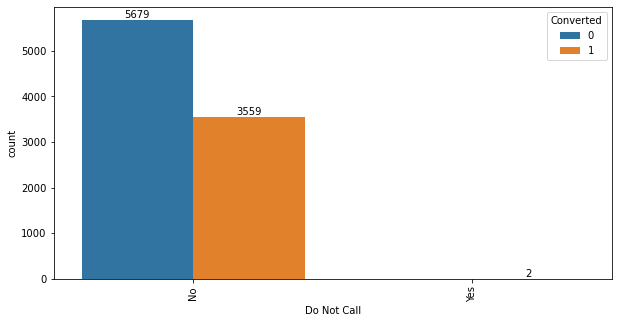

In [359]:
plt.figure(figsize=(10,5))
e1=sns.countplot(leadswithoutduplicate['Do Not Call'], hue=leadswithoutduplicate.Converted)
e1.set_xticklabels(e1.get_xticklabels(),rotation=90)
for label in e1.containers:
    e1.bar_label(label)
plt.show()

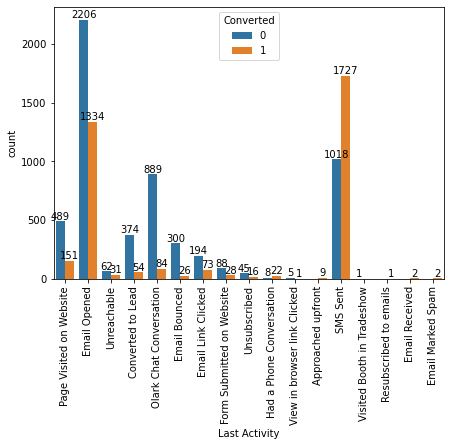

In [360]:
plt.figure(figsize=(7,5))
f1=sns.countplot(leadswithoutduplicate['Last Activity'], hue=leadswithoutduplicate.Converted)
f1.set_xticklabels(f1.get_xticklabels(),rotation=90)
for label in f1.containers:
    f1.bar_label(label)
plt.show()

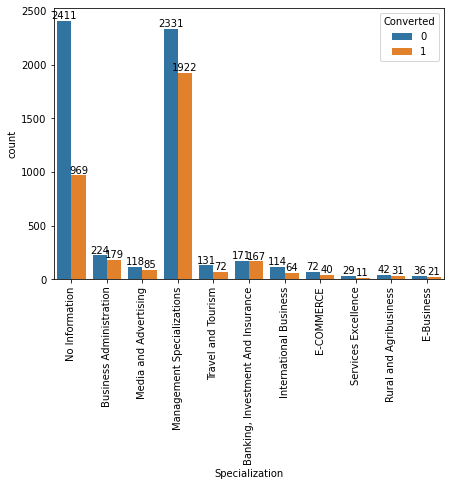

In [361]:
plt.figure(figsize=(7,5))
g1=sns.countplot(leadswithoutduplicate['Specialization'], hue=leadswithoutduplicate.Converted)
g1.set_xticklabels(g1.get_xticklabels(),rotation=90)
for label in g1.containers:
    g1.bar_label(label)
plt.show()

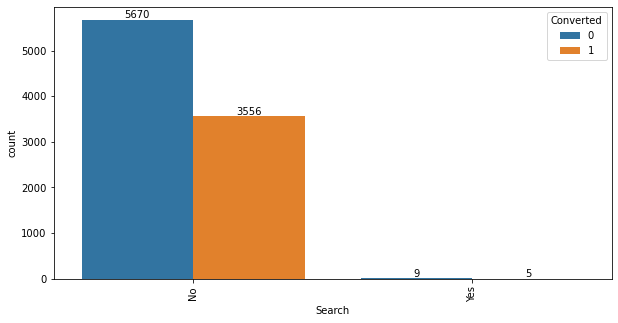

In [362]:
plt.figure(figsize=(10,5))
j1=sns.countplot(leadswithoutduplicate['Search'], hue=leadswithoutduplicate.Converted)
j1.set_xticklabels(j1.get_xticklabels(),rotation=90)
for label in j1.containers:
    j1.bar_label(label)
plt.show()

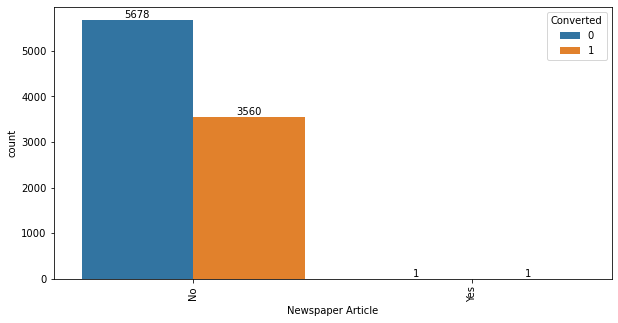

In [363]:
plt.figure(figsize=(10,5))
k1=sns.countplot(leadswithoutduplicate['Newspaper Article'], hue=leadswithoutduplicate.Converted)
k1.set_xticklabels(k1.get_xticklabels(),rotation=90)
for label in k1.containers:
    k1.bar_label(label)
plt.show()

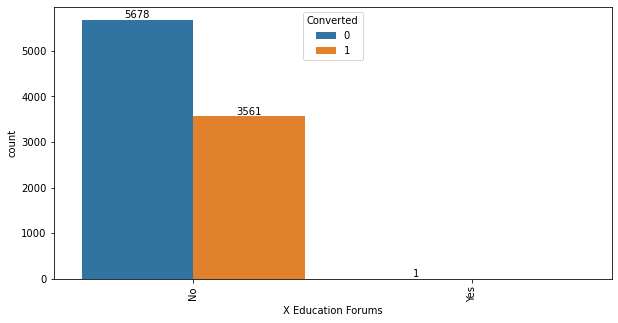

In [364]:
plt.figure(figsize=(10,5))
k1=sns.countplot(leadswithoutduplicate['X Education Forums'], hue=leadswithoutduplicate.Converted)
k1.set_xticklabels(k1.get_xticklabels(),rotation=90)
for label in k1.containers:
    k1.bar_label(label)
plt.show()

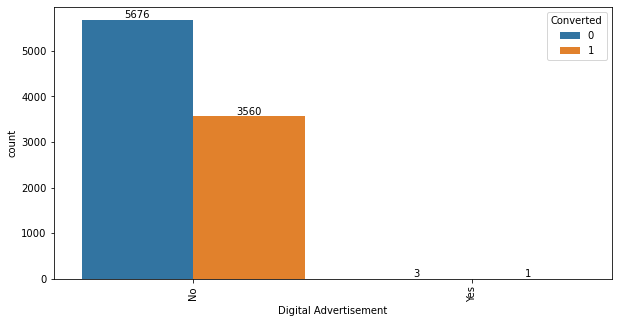

In [365]:
plt.figure(figsize=(10,5))
m1=sns.countplot(leadswithoutduplicate['Digital Advertisement'], hue=leadswithoutduplicate.Converted)
m1.set_xticklabels(m1.get_xticklabels(),rotation=90)
for label in m1.containers:
    m1.bar_label(label)
plt.show()

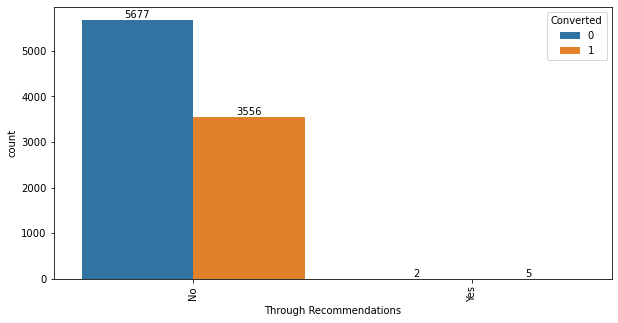

In [366]:
plt.figure(figsize=(10,5))
n1=sns.countplot(leadswithoutduplicate['Through Recommendations'], hue=leadswithoutduplicate.Converted)
n1.set_xticklabels(n1.get_xticklabels(),rotation=90)
for label in n1.containers:
    n1.bar_label(label)
plt.show()

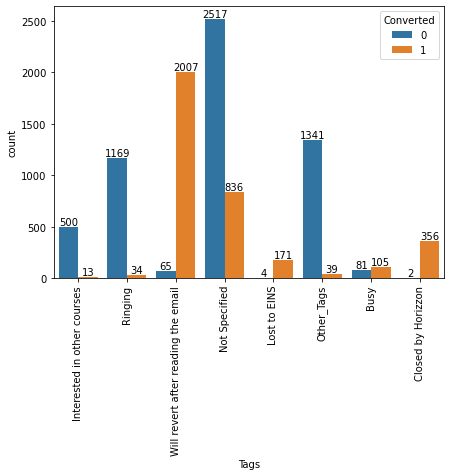

In [367]:
plt.figure(figsize=(7,5))
o1=sns.countplot(leadswithoutduplicate['Tags'], hue=leadswithoutduplicate.Converted)
o1.set_xticklabels(o1.get_xticklabels(),rotation=90)
for label in o1.containers:
    o1.bar_label(label)
plt.show()
#

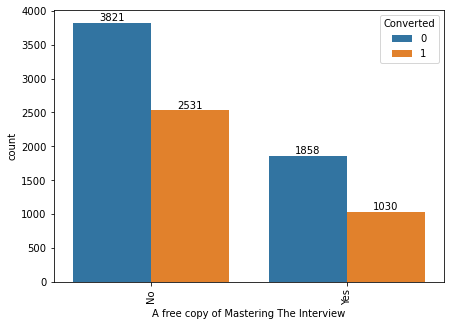

In [368]:
plt.figure(figsize=(7,5))
p1=sns.countplot(leadswithoutduplicate['A free copy of Mastering The Interview'], hue=leadswithoutduplicate.Converted)
p1.set_xticklabels(p1.get_xticklabels(),rotation=90)
for label in p1.containers:
    p1.bar_label(label)
plt.show()

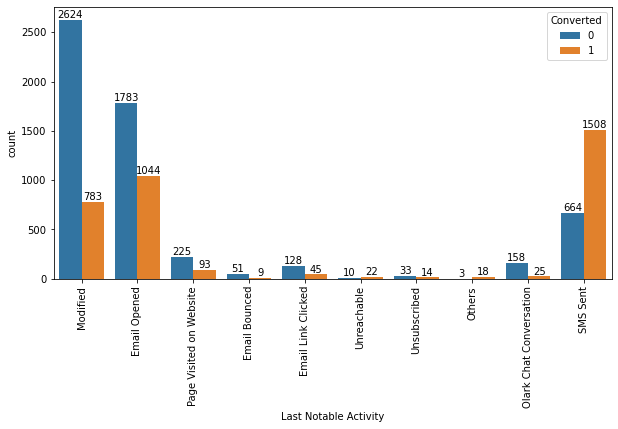

In [369]:
plt.figure(figsize=(10,5))
q1=sns.countplot(leadswithoutduplicate['Last Notable Activity'], hue=leadswithoutduplicate.Converted)
q1.set_xticklabels(q1.get_xticklabels(),rotation=90)
for label in q1.containers:
    q1.bar_label(label)
plt.show()

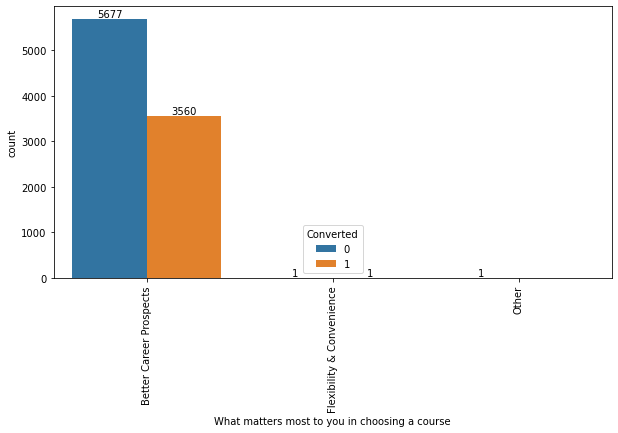

In [370]:
plt.figure(figsize=(10,5))
i1=sns.countplot(leadswithoutduplicate['What matters most to you in choosing a course'], hue=leadswithoutduplicate.Converted)
i1.set_xticklabels(i1.get_xticklabels(),rotation=90)
for label in i1.containers:
    i1.bar_label(label)
plt.show()

In [371]:
# Dropping these columns due to the lack of variation in data
leadswithoutduplicate.drop(['Search','Through Recommendations','Newspaper','X Education Forums','Digital Advertisement','Newspaper Article'],axis=1,inplace=True)

In [372]:
# Dropping this column due to the lack of variation in data
leadswithoutduplicate.drop(['Do Not Call'],axis=1,inplace=True)

In [373]:
# Dropping this column due to the lack of variation in data
leadswithoutduplicate.drop(['What matters most to you in choosing a course'],axis=1,inplace=True)

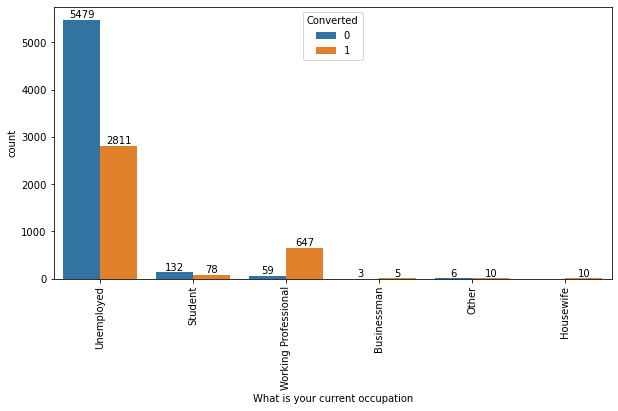

In [374]:
plt.figure(figsize=(10,5))
h1=sns.countplot(leadswithoutduplicate['What is your current occupation'], hue=leadswithoutduplicate.Converted)
h1.set_xticklabels(h1.get_xticklabels(),rotation=90)
for label in h1.containers:
    h1.bar_label(label)
plt.show()

In the case of Specialization maximum conversion has been observed in the case of Management Specialization

In the case of Occupation maximum conversion has been observed in the case of Unemployed

In the case of Do Not Email maximum conversion has been observed in the case of No 

In the case of Lead Origin maximum conversion has been observed in the case of  Landing Page Submission.

In the case of Lead Source maximum conversion has been observed in the case of Google

In the case of Last Activity maximum conversion has been observed in the case of SMS Sent

In the case of Last Notable Activity maximum conversion has been observed in the case of SMS Sent

In the case of A free copy of mastering the interview  maximum conversion has been observed in the case of No

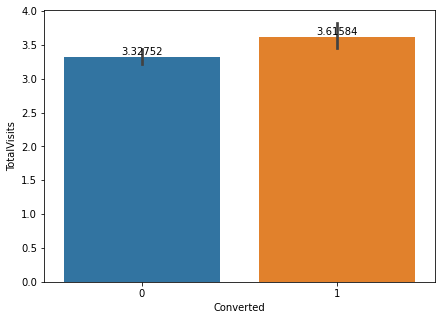

In [375]:
#Numerical Variables
plt.figure(figsize=(7,5))
r1=sns.barplot(y='TotalVisits', x='Converted',data=leadswithoutduplicate)
r1.set_xticklabels(r1.get_xticklabels(),rotation=360)
for label in r1.containers:
    r1.bar_label(label)
plt.show()

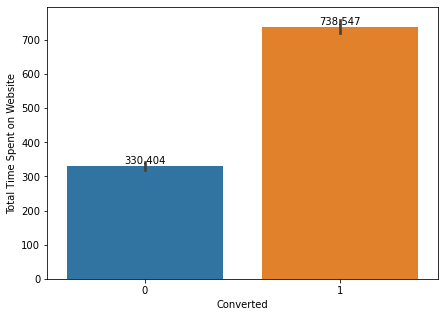

In [376]:
plt.figure(figsize=(7,5))
t1=sns.barplot(y='Total Time Spent on Website', x='Converted',data=leadswithoutduplicate)
t1.set_xticklabels(t1.get_xticklabels(),rotation=360,ha='center')
for label in t1.containers:
    t1.bar_label(label)
plt.show()

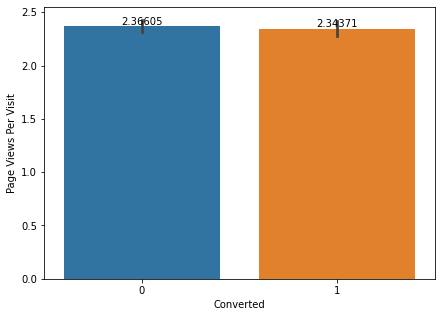

In [377]:
plt.figure(figsize=(7,5))
t1=sns.barplot(y='Page Views Per Visit', x='Converted',data=leadswithoutduplicate)
t1.set_xticklabels(t1.get_xticklabels(),rotation=360,ha='center')
for label in t1.containers:
    t1.bar_label(label)
plt.show()

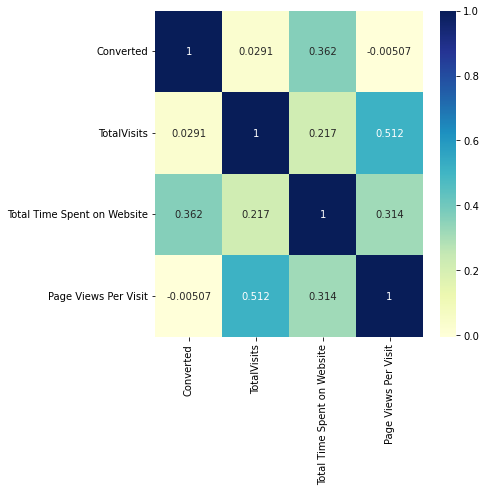

In [378]:
plt.figure(figsize = (6,6))
sns.heatmap(leadswithoutduplicate[['Converted','TotalVisits','Total Time Spent on Website','Page Views Per Visit']].corr(), annot = True, fmt='0.3g', cmap="YlGnBu")
plt.show()

In [380]:
leadswithoutduplicate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9240 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Prospect ID                             9240 non-null   object 
 1   Lead Origin                             9240 non-null   object 
 2   Lead Source                             9240 non-null   object 
 3   Do Not Email                            9240 non-null   object 
 4   Converted                               9240 non-null   int64  
 5   TotalVisits                             9240 non-null   float64
 6   Total Time Spent on Website             9240 non-null   int64  
 7   Page Views Per Visit                    9240 non-null   float64
 8   Last Activity                           9240 non-null   object 
 9   Specialization                          9240 non-null   object 
 10  What is your current occupation         9240 non-null   obje

## Dummy Variable Creation

In [381]:
# Creating Dummies
LeadOrigin=pd.get_dummies(leadswithoutduplicate['Lead Origin'],prefix='LeadOrigin',drop_first=True)

In [382]:
LeadSource=pd.get_dummies(leadswithoutduplicate['Lead Source'],prefix='LeadSource',drop_first=True)

In [383]:
DoNotEmail=pd.get_dummies(leadswithoutduplicate['Do Not Email'],prefix='DoNotEmail',drop_first=True)

In [384]:
LastActivity=pd.get_dummies(leadswithoutduplicate['Last Activity'],prefix='LastActivity',drop_first=True)

In [385]:
Specialization1=pd.get_dummies(leadswithoutduplicate['Specialization'],prefix='Specialization1',drop_first=True)

In [386]:
Whatisyourcurrentoccupation=pd.get_dummies(leadswithoutduplicate['What is your current occupation'],prefix='Whatisyourcurrentoccupation',drop_first=True)

In [387]:
Tags1=pd.get_dummies(leadswithoutduplicate['Tags'],prefix='Tags1',drop_first=True)

In [388]:
AfreecopyofMasteringTheInterview=pd.get_dummies(leadswithoutduplicate['A free copy of Mastering The Interview'],prefix='AfreecopyofMasteringTheInterview',drop_first=True)

In [389]:
LastNotableActivity=pd.get_dummies(leadswithoutduplicate['Last Notable Activity'],prefix='LastNotableActivity',drop_first=True)

In [390]:
leadswithoutduplicate=pd.concat([leadswithoutduplicate,LeadOrigin,LeadSource,DoNotEmail,LastActivity,Specialization1,Whatisyourcurrentoccupation,Tags1,AfreecopyofMasteringTheInterview,LastNotableActivity],axis=1)

In [391]:
leadswithoutduplicate.drop(['Lead Origin','Lead Source','Do Not Email','Last Activity','Specialization','A free copy of Mastering The Interview','Last Notable Activity','What is your current occupation','Tags'],axis=1,inplace=True)

In [392]:
leadswithoutduplicate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9240 entries, 0 to 9239
Data columns (total 77 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Prospect ID                                       9240 non-null   object 
 1   Converted                                         9240 non-null   int64  
 2   TotalVisits                                       9240 non-null   float64
 3   Total Time Spent on Website                       9240 non-null   int64  
 4   Page Views Per Visit                              9240 non-null   float64
 5   LeadOrigin_Landing Page Submission                9240 non-null   uint8  
 6   LeadOrigin_Lead Add Form                          9240 non-null   uint8  
 7   LeadOrigin_Lead Import                            9240 non-null   uint8  
 8   LeadOrigin_Quick Add Form                         9240 non-null   uint8  
 9   LeadSource_Direct T

# Spliting into Train and Test Dataset

In [393]:
Y=leadswithoutduplicate['Converted']
Y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [394]:
X=leadswithoutduplicate.drop(['Converted','Prospect ID'], axis=1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,LeadOrigin_Landing Page Submission,LeadOrigin_Lead Add Form,LeadOrigin_Lead Import,LeadOrigin_Quick Add Form,LeadSource_Direct Traffic,LeadSource_Facebook,LeadSource_Google,...,AfreecopyofMasteringTheInterview_Yes,LastNotableActivity_Email Link Clicked,LastNotableActivity_Email Opened,LastNotableActivity_Modified,LastNotableActivity_Olark Chat Conversation,LastNotableActivity_Others,LastNotableActivity_Page Visited on Website,LastNotableActivity_SMS Sent,LastNotableActivity_Unreachable,LastNotableActivity_Unsubscribed
0,0.0,0,0.0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,0,0,0,1,0,0,...,1,0,1,0,0,0,0,0,0,0
3,1.0,305,1.0,1,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,2.0,1428,1.0,1,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0


In [395]:
# Spliting data into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.7, test_size=0.3, random_state=100)

In [396]:
# Scaling the numerical variables
scaler=MinMaxScaler()
num_vars=['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
X_train[num_vars]=scaler.fit_transform(X_train[num_vars])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,LeadOrigin_Landing Page Submission,LeadOrigin_Lead Add Form,LeadOrigin_Lead Import,LeadOrigin_Quick Add Form,LeadSource_Direct Traffic,LeadSource_Facebook,LeadSource_Google,...,AfreecopyofMasteringTheInterview_Yes,LastNotableActivity_Email Link Clicked,LastNotableActivity_Email Opened,LastNotableActivity_Modified,LastNotableActivity_Olark Chat Conversation,LastNotableActivity_Others,LastNotableActivity_Page Visited on Website,LastNotableActivity_SMS Sent,LastNotableActivity_Unreachable,LastNotableActivity_Unsubscribed
1871,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
6795,0.015936,0.214349,0.024182,1,0,0,0,1,0,0,...,1,0,1,0,0,0,0,0,0,0
3516,0.019920,0.046655,0.045455,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
8105,0.019920,0.541373,0.090909,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3934,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [397]:
rfe=RFE(estimator=LogisticRegression())
rfe=rfe.fit(X_train,Y_train)

In [398]:
rfe.support_

array([ True,  True, False,  True,  True, False,  True, False,  True,
       False, False,  True,  True, False, False, False,  True, False,
       False, False,  True,  True, False, False, False, False,  True,
        True,  True, False, False, False, False, False, False,  True,
        True, False,  True, False, False,  True, False, False, False,
        True,  True, False, False, False,  True,  True,  True,  True,
       False, False, False,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True, False,  True,  True,  True, False,
        True, False, False])

In [399]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 25),
 ('LeadOrigin_Landing Page Submission', True, 1),
 ('LeadOrigin_Lead Add Form', True, 1),
 ('LeadOrigin_Lead Import', False, 29),
 ('LeadOrigin_Quick Add Form', True, 1),
 ('LeadSource_Direct Traffic', False, 3),
 ('LeadSource_Facebook', True, 1),
 ('LeadSource_Google', False, 5),
 ('LeadSource_Live Chat', False, 37),
 ('LeadSource_NC_EDM', True, 1),
 ('LeadSource_Olark Chat', True, 1),
 ('LeadSource_Organic Search', False, 4),
 ('LeadSource_Pay per Click Ads', False, 35),
 ('LeadSource_Press_Release', False, 24),
 ('LeadSource_Reference', True, 1),
 ('LeadSource_Referral Sites', False, 2),
 ('LeadSource_Social Media', False, 23),
 ('LeadSource_WeLearn', False, 31),
 ('LeadSource_Welingak Website', True, 1),
 ('LeadSource_bing', True, 1),
 ('LeadSource_blog', False, 6),
 ('LeadSource_testone', False, 39),
 ('LeadSource_welearnblog_Home', False, 12),
 ('LeadSource_youtubechannel',

In [400]:
col=X_train.columns[rfe.support_]

In [401]:
X_train.columns[~rfe.support_]

Index(['Page Views Per Visit', 'LeadOrigin_Lead Import',
       'LeadSource_Direct Traffic', 'LeadSource_Google',
       'LeadSource_Live Chat', 'LeadSource_Organic Search',
       'LeadSource_Pay per Click Ads', 'LeadSource_Press_Release',
       'LeadSource_Referral Sites', 'LeadSource_Social Media',
       'LeadSource_WeLearn', 'LeadSource_blog', 'LeadSource_testone',
       'LeadSource_welearnblog_Home', 'LeadSource_youtubechannel',
       'LastActivity_Email Link Clicked', 'LastActivity_Email Marked Spam',
       'LastActivity_Email Opened', 'LastActivity_Email Received',
       'LastActivity_Form Submitted on Website',
       'LastActivity_Had a Phone Conversation',
       'LastActivity_Resubscribed to emails', 'LastActivity_Unreachable',
       'LastActivity_Unsubscribed', 'LastActivity_Visited Booth in Tradeshow',
       'Specialization1_Business Administration', 'Specialization1_E-Business',
       'Specialization1_Management Specializations',
       'Specialization1_Media and

In [402]:
X_train_sm=sm.add_constant(X_train[col])
logm2=sm.GLM(Y_train,X_train_sm,family=sm.families.Binomial())
res=logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6430
Model Family:                Binomial   Df Model:                           37
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1243.6
Date:                Tue, 21 Mar 2023   Deviance:                       2487.2
Time:                        16:56:14   Pearson chi2:                 1.14e+04
No. Iterations:                    21   Pseudo R-squ. (CS):             0.6112
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                               -1.4711      0.273     -5.382      0.000      -2.007      -0.935
TotalVisits                                          6.4382      1.769      3.639      0.000       2.970       9.906
Total Time Spent on Website                          4.2949      0.250     17.172      0.000       3.805       4.785
LeadOrigin_Landing Page Submission                  -0.8253      0.138     -5.974      0.000      -1.096      -0.555
LeadOrigin_Lead Add Form                             1.8593      0.770      2.413      0.016       0.349       3.369
LeadOrigin_Quick Add Form                           22.2407   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
LeadSource_Facebook                                 -0.5792      0.758     -0.765      0.445      -2.064       0.906
LeadSource_NC_EDM                                   23.5169   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
LeadSource_Olark Chat                                0.7489      0.169      4.433      0.000       0.418       1.080
LeadSource_Reference                                -1.0207      0.856     -1.193      0.233      -2.698       0.657
LeadSource_Welingak Website                          3.2138      1.056      3.044      0.002       1.145       5.283
LeadSource_bing                                      1.5423      1.876      0.822      0.411      -2.134       5.219
DoNotEmail_Yes                                      -0.6706      0.284     -2.360      0.018      -1.227      -0.114
LastActivity_Converted to Lead                      -0.5153      0.397     -1.297      0.195      -1.294       0.263
LastActivity_Email Bounced                          -0.4135      0.526     -0.786      0.432      -1.444       0.617
LastActivity_Olark Chat Conversation                -0.6579      0.307     -2.146      0.032      -1.259      -0.057
LastActivity_Page Visited on Website                -0.7174      0.250     -2.874      0.004      -1.207      -0.228
LastActivity_SMS Sent                                1.2224      0.261      4.684      0.000       0.711       1.734
LastActivity_View in browser link Clicked            1.4814      1.286      1.152      0.250      -1.040       4.003
Specialization1_E-COMMERCE                           0.3735      0.480      0.778      0.437      -0.567       1.314
Specialization1_International Business              -0.6346      0.435     -1.459      0.145      -1.487       0.218
Specialization1_Rural and Agribusiness               0.3288      0.738      0.445      0.656      -1.118       1.775
Specialization1_Services Excellence                  0.7374      0.663      1.111      0.266      -0.563       2.038
Specialization1_Travel and Tourism       

In [403]:
Y_train_pred1=res.predict(X_train_sm)

In [404]:
Y_train_pred_final1=pd.DataFrame({'Converted':Y_train.values,'Converted_Prob':Y_train_pred1})
Y_train_pred_final1['Prospect ID']=Y_train.index
Y_train_pred_final1.head()

,Converted,Converted_Prob,Prospect ID
1871,0,0.008623,1871
6795,0,0.133877,6795
3516,0,0.011938,3516
8105,0,0.269107,8105
3934,0,0.077053,3934


In [405]:
Y_train_pred_final1['predicted']=Y_train_pred_final1.Converted_Prob.map(lambda x:1 if x>0.5 else 0)
Y_train_pred_final1.head()

,Converted,Converted_Prob,Prospect ID,predicted
1871,0,0.008623,1871,0
6795,0,0.133877,6795,0
3516,0,0.011938,3516,0
8105,0,0.269107,8105,0
3934,0,0.077053,3934,0


In [406]:
confusion1=metrics.confusion_matrix(Y_train_pred_final1.Converted,Y_train_pred_final1.predicted)
print(confusion1)

[[3836  166]
 [ 285 2181]]


In [407]:
print(metrics.accuracy_score(Y_train_pred_final1.Converted,Y_train_pred_final1.predicted))

0.9302721088435374


In [408]:
# Checking for multicollinearity
vif=pd.DataFrame()
vif['Features']=X_train[col].columns
vif['VIF']=[variance_inflation_factor(X_train[col].values,i)for i in range(X_train[col].shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
3,LeadOrigin_Lead Add Form,16.31
8,LeadSource_Reference,13.09
16,LastActivity_SMS Sent,7.30
36,LastNotableActivity_SMS Sent,7.24
9,LeadSource_Welingak Website,3.81
33,LastNotableActivity_Modified,3.80
2,LeadOrigin_Landing Page Submission,3.67
28,Tags1_Not Specified,3.59
31,Tags1_Will revert after reading the email,3.43
1,Total Time Spent on Website,2.45


In [409]:
# Dropping variables with high p value low VIF
X_train_rfe1=X_train[col].drop(columns=['LeadSource_Facebook','LeadSource_NC_EDM','LeadSource_Reference','LeadSource_bing','LastActivity_Converted to Lead','LastActivity_Email Bounced','LastActivity_View in browser link Clicked','Specialization1_E-COMMERCE','Specialization1_International Business','Specialization1_Rural and Agribusiness','Specialization1_Services Excellence','Specialization1_Travel and Tourism','Whatisyourcurrentoccupation_Housewife','LastNotableActivity_Others'],axis=1)

In [410]:
X_train_rfe2=sm.add_constant(X_train_rfe1)

In [411]:
logm3=sm.GLM(Y_train,X_train_rfe2,family=sm.families.Binomial())
res=logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6444
Model Family:                Binomial   Df Model:                           23
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1253.6
Date:                Tue, 21 Mar 2023   Deviance:                       2507.2
Time:                        16:56:53   Pearson chi2:                 1.01e+04
No. Iterations:                    19   Pseudo R-squ. (CS):             0.6100
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                               -1.5028      0.270     -5.558      0.000      -2.033      -0.973
TotalVisits                                          6.6702      1.834      3.637      0.000       3.076      10.265
Total Time Spent on Website                          4.2761      0.247     17.296      0.000       3.792       4.761
LeadOrigin_Landing Page Submission                  -0.7993      0.135     -5.928      0.000      -1.064      -0.535
LeadOrigin_Lead Add Form                             1.1079      0.375      2.958      0.003       0.374       1.842
LeadOrigin_Quick Add Form                           20.4270   1.77e+04      0.001      0.999   -3.47e+04    3.48e+04
LeadSource_Olark Chat                                0.7806      0.167      4.675      0.000       0.453       1.108
LeadSource_Welingak Website                          3.9972      0.815      4.905      0.000       2.400       5.595
DoNotEmail_Yes                                      -0.7534      0.241     -3.129      0.002      -1.225      -0.281
LastActivity_Olark Chat Conversation                -0.5463      0.293     -1.867      0.062      -1.120       0.027
LastActivity_Page Visited on Website                -0.6806      0.245     -2.780      0.005      -1.160      -0.201
LastActivity_SMS Sent                                1.3257      0.241      5.500      0.000       0.853       1.798
Whatisyourcurrentoccupation_Working Professional     0.8158      0.369      2.209      0.027       0.092       1.540
Tags1_Closed by Horizzon                             6.5392      1.047      6.248      0.000       4.488       8.590
Tags1_Interested in other courses                   -2.5155      0.427     -5.887      0.000      -3.353      -1.678
Tags1_Lost to EINS                                   5.5113      0.766      7.196      0.000       4.010       7.012
Tags1_Not Specified                                 -0.5829      0.238     -2.445      0.014      -1.050      -0.116
Tags1_Other_Tags                                    -2.8888      0.300     -9.637      0.000      -3.476      -2.301
Tags1_Ringing                                       -3.9998      0.316    -12.650      0.000      -4.620      -3.380
Tags1_Will revert after reading the email            3.8114      0.292     13.070      0.000       3.240       4.383
LastNotableActivity_Email Link Clicked              -1.2572      0.449     -2.800      0.005      -2.137      -0.377
LastNotableActivity_Modified                        -1.2742      0.176     -7.248      0.000      -1.619      -0.930
LastNotableActivity_Olark Chat Conversation         -1.1276      0.513     -2.196      0.028      -2.134      -0.121
LastNotableActivity_SMS Sent             

In [412]:
Y_train_pred2=res.predict(X_train_rfe2)

In [413]:
Y_train_pred_final2=pd.DataFrame({'Converted':Y_train.values,'Converted_Prob':Y_train_pred2})
Y_train_pred_final2['Prospect ID']=Y_train.index
Y_train_pred_final2.head()

,Converted,Converted_Prob,Prospect ID
1871,0,0.008819,1871
6795,0,0.134459,6795
3516,0,0.012253,3516
8105,0,0.149057,8105
3934,0,0.070483,3934


In [414]:
Y_train_pred_final2['predicted']=Y_train_pred_final2.Converted_Prob.map(lambda x:1 if x>0.5 else 0)
Y_train_pred_final2.head()

,Converted,Converted_Prob,Prospect ID,predicted
1871,0,0.008819,1871,0
6795,0,0.134459,6795,0
3516,0,0.012253,3516,0
8105,0,0.149057,8105,0
3934,0,0.070483,3934,0


In [415]:
confusion2=metrics.confusion_matrix(Y_train_pred_final2.Converted,Y_train_pred_final2.predicted)
print(confusion2)

[[3837  165]
 [ 287 2179]]


In [416]:
print(metrics.accuracy_score(Y_train_pred_final2.Converted,Y_train_pred_final2.predicted))

0.930117501546073


In [417]:
vif1=pd.DataFrame()
vif1['Features']=X_train_rfe1.columns
vif1['VIF']=[variance_inflation_factor(X_train_rfe1.values,i)for i in range(X_train_rfe1.shape[1])]
vif1['VIF']=round(vif1['VIF'],2)
vif1=vif1.sort_values(by='VIF',ascending=False)
vif1

,Features,VIF
22,LastNotableActivity_SMS Sent,6.68
10,LastActivity_SMS Sent,6.44
2,LeadOrigin_Landing Page Submission,3.55
15,Tags1_Not Specified,3.50
18,Tags1_Will revert after reading the email,3.36
20,LastNotableActivity_Modified,2.99
1,Total Time Spent on Website,2.43
5,LeadSource_Olark Chat,2.34
3,LeadOrigin_Lead Add Form,2.13
8,LastActivity_Olark Chat Conversation,2.07


In [418]:
# Dropping variables with high p value and low VIF
X_train_rfe3=X_train_rfe1.drop(columns=['LeadOrigin_Quick Add Form','LastActivity_Olark Chat Conversation'],axis=1)

In [419]:
X_train_rfe4=sm.add_constant(X_train_rfe3)

In [420]:
logm4=sm.GLM(Y_train,X_train_rfe4,family=sm.families.Binomial())
res=logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6446
Model Family:                Binomial   Df Model:                           21
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1256.1
Date:                Tue, 21 Mar 2023   Deviance:                       2512.2
Time:                        16:57:07   Pearson chi2:                 1.06e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6097
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                               -1.5118      0.271     -5.580      0.000      -2.043      -0.981
TotalVisits                                          6.5103      1.809      3.599      0.000       2.965      10.056
Total Time Spent on Website                          4.3155      0.247     17.484      0.000       3.832       4.799
LeadOrigin_Landing Page Submission                  -0.7904      0.135     -5.860      0.000      -1.055      -0.526
LeadOrigin_Lead Add Form                             1.1330      0.376      3.009      0.003       0.395       1.871
LeadSource_Olark Chat                                0.7347      0.165      4.447      0.000       0.411       1.058
LeadSource_Welingak Website                          4.0100      0.817      4.909      0.000       2.409       5.611
DoNotEmail_Yes                                      -0.6968      0.238     -2.925      0.003      -1.164      -0.230
LastActivity_Page Visited on Website                -0.6269      0.243     -2.578      0.010      -1.104      -0.150
LastActivity_SMS Sent                                1.4881      0.226      6.578      0.000       1.045       1.931
Whatisyourcurrentoccupation_Working Professional     0.8314      0.371      2.244      0.025       0.105       1.558
Tags1_Closed by Horizzon                             6.6289      1.047      6.334      0.000       4.578       8.680
Tags1_Interested in other courses                   -2.5061      0.428     -5.862      0.000      -3.344      -1.668
Tags1_Lost to EINS                                   5.5851      0.767      7.285      0.000       4.082       7.088
Tags1_Not Specified                                 -0.5827      0.239     -2.439      0.015      -1.051      -0.114
Tags1_Other_Tags                                    -2.8954      0.300     -9.644      0.000      -3.484      -2.307
Tags1_Ringing                                       -4.0077      0.317    -12.653      0.000      -4.629      -3.387
Tags1_Will revert after reading the email            3.8375      0.293     13.113      0.000       3.264       4.411
LastNotableActivity_Email Link Clicked              -1.2509      0.454     -2.758      0.006      -2.140      -0.362
LastNotableActivity_Modified                        -1.4431      0.153     -9.450      0.000      -1.742      -1.144
LastNotableActivity_Olark Chat Conversation         -1.6436      0.435     -3.780      0.000      -2.496      -0.791
LastNotableActivity_SMS Sent                         0.6270      0.259      2.422      0.015       0.120       1.134
====================================================================================================================
"""

In [421]:
Y_train_pred3=res.predict(X_train_rfe4)

In [422]:
Y_train_pred_final3=pd.DataFrame({'Converted':Y_train.values,'Converted_Prob':Y_train_pred3})
Y_train_pred_final3['Prospect ID']=Y_train.index
Y_train_pred_final3.head()

,Converted,Converted_Prob,Prospect ID
1871,0,0.008286,1871
6795,0,0.135153,6795
3516,0,0.011500,3516
8105,0,0.150736,8105
3934,0,0.057166,3934


In [423]:
Y_train_pred_final3['predicted']=Y_train_pred_final3.Converted_Prob.map(lambda x:1 if x>0.5 else 0)
Y_train_pred_final3.head()

,Converted,Converted_Prob,Prospect ID,predicted
1871,0,0.008286,1871,0
6795,0,0.135153,6795,0
3516,0,0.011500,3516,0
8105,0,0.150736,8105,0
3934,0,0.057166,3934,0


In [424]:
confusion3=metrics.confusion_matrix(Y_train_pred_final3.Converted,Y_train_pred_final3.predicted)
print(confusion3)

[[3832  170]
 [ 285 2181]]


In [425]:
print(metrics.accuracy_score(Y_train_pred_final3.Converted,Y_train_pred_final3.predicted))

0.9296536796536796


In [426]:
vif2=pd.DataFrame()
vif2['Features']=X_train_rfe3.columns
vif2['VIF']=[variance_inflation_factor(X_train_rfe3.values,i)for i in range(X_train_rfe3.shape[1])]
vif2['VIF']=round(vif2['VIF'],2)
vif2=vif2.sort_values(by='VIF',ascending=False)
vif2

,Features,VIF
20,LastNotableActivity_SMS Sent,6.38
8,LastActivity_SMS Sent,6.06
2,LeadOrigin_Landing Page Submission,3.52
13,Tags1_Not Specified,3.49
16,Tags1_Will revert after reading the email,3.36
18,LastNotableActivity_Modified,2.48
1,Total Time Spent on Website,2.43
4,LeadSource_Olark Chat,2.21
3,LeadOrigin_Lead Add Form,2.13
14,Tags1_Other_Tags,2.06


In [427]:
# Dropping variable with high VIF and low p value
X_train_rfe5=X_train_rfe3.drop(columns=['LastNotableActivity_SMS Sent'],axis=1)

In [428]:
X_train_rfe6=sm.add_constant(X_train_rfe5)

In [429]:
logm5=sm.GLM(Y_train,X_train_rfe6,family=sm.families.Binomial())
res=logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6447
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1259.1
Date:                Tue, 21 Mar 2023   Deviance:                       2518.1
Time:                        16:57:21   Pearson chi2:                 1.08e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6094
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                               -1.4387      0.267     -5.398      0.000      -1.961      -0.916
TotalVisits                                          6.2833      1.776      3.537      0.000       2.802       9.765
Total Time Spent on Website                          4.3093      0.246     17.513      0.000       3.827       4.792
LeadOrigin_Landing Page Submission                  -0.7983      0.134     -5.955      0.000      -1.061      -0.536
LeadOrigin_Lead Add Form                             1.1354      0.379      2.994      0.003       0.392       1.879
LeadSource_Olark Chat                                0.7618      0.164      4.633      0.000       0.439       1.084
LeadSource_Welingak Website                          4.0108      0.820      4.893      0.000       2.404       5.618
DoNotEmail_Yes                                      -0.6762      0.238     -2.845      0.004      -1.142      -0.210
LastActivity_Page Visited on Website                -0.6028      0.243     -2.480      0.013      -1.079      -0.126
LastActivity_SMS Sent                                1.9544      0.118     16.523      0.000       1.723       2.186
Whatisyourcurrentoccupation_Working Professional     0.8386      0.369      2.274      0.023       0.116       1.561
Tags1_Closed by Horizzon                             6.7275      1.047      6.428      0.000       4.676       8.779
Tags1_Interested in other courses                   -2.4854      0.425     -5.843      0.000      -3.319      -1.652
Tags1_Lost to EINS                                   5.6726      0.768      7.389      0.000       4.168       7.177
Tags1_Not Specified                                 -0.6070      0.236     -2.569      0.010      -1.070      -0.144
Tags1_Other_Tags                                    -2.8846      0.298     -9.674      0.000      -3.469      -2.300
Tags1_Ringing                                       -3.9524      0.314    -12.606      0.000      -4.567      -3.338
Tags1_Will revert after reading the email            3.8703      0.293     13.226      0.000       3.297       4.444
LastNotableActivity_Email Link Clicked              -1.3266      0.455     -2.914      0.004      -2.219      -0.434
LastNotableActivity_Modified                        -1.6697      0.125    -13.384      0.000      -1.914      -1.425
LastNotableActivity_Olark Chat Conversation         -1.7145      0.434     -3.947      0.000      -2.566      -0.863
====================================================================================================================
"""

In [430]:
Y_train_pred4=res.predict(X_train_rfe6)

In [431]:
Y_train_pred_final4=pd.DataFrame({'Converted':Y_train.values,'Converted_Prob':Y_train_pred4})
Y_train_pred_final4['Prospect ID']=Y_train.index
Y_train_pred_final4.head()

,Converted,Converted_Prob,Prospect ID
1871,0,0.009667,1871
6795,0,0.139416,6795
3516,0,0.013346,3516
8105,0,0.144684,8105
3934,0,0.049567,3934


In [432]:
Y_train_pred_final4['predicted']=Y_train_pred_final4.Converted_Prob.map(lambda x:1 if x>0.5 else 0)
Y_train_pred_final4.head()

,Converted,Converted_Prob,Prospect ID,predicted
1871,0,0.009667,1871,0
6795,0,0.139416,6795,0
3516,0,0.013346,3516,0
8105,0,0.144684,8105,0
3934,0,0.049567,3934,0


In [433]:
confusion4=metrics.confusion_matrix(Y_train_pred_final4.Converted,Y_train_pred_final4.predicted)
print(confusion4)

[[3833  169]
 [ 289 2177]]


In [434]:
#Predicted     Not Converted  Converted
#Actual 
#Not Converted  3833           169
#Converted      289            2177

In [435]:
print(metrics.accuracy_score(Y_train_pred_final4.Converted,Y_train_pred_final4.predicted))

0.9291898577612864


In [436]:
vif3=pd.DataFrame()
vif3['Features']=X_train_rfe5.columns
vif3['VIF']=[variance_inflation_factor(X_train_rfe5.values,i)for i in range(X_train_rfe5.shape[1])]
vif3['VIF']=round(vif3['VIF'],2)
vif3=vif3.sort_values(by='VIF',ascending=False)
vif3

,Features,VIF
2,LeadOrigin_Landing Page Submission,3.51
13,Tags1_Not Specified,3.45
16,Tags1_Will revert after reading the email,3.29
1,Total Time Spent on Website,2.42
4,LeadSource_Olark Chat,2.19
3,LeadOrigin_Lead Add Form,2.13
14,Tags1_Other_Tags,2.02
18,LastNotableActivity_Modified,1.95
15,Tags1_Ringing,1.79
0,TotalVisits,1.72


### Accuracy in 1st case was 93.02% in 2nd case was 93.01% in the 3rd case was 92.97% and in the final selected case based on p values and VIF it was 92.92%.Accuracy has not changed with dropping variables

In [437]:
TP = confusion4[1,1] # true positive 
TN = confusion4[0,0] # true negatives
FP = confusion4[0,1] # false positives
FN = confusion4[1,0] # false negatives

In [438]:
Sensitivity=float(TP/(TP+FN))
print(Sensitivity)

0.8828061638280617


In [439]:
Specificity=float(TN/(TN+FP))
print(Specificity)

0.9577711144427786


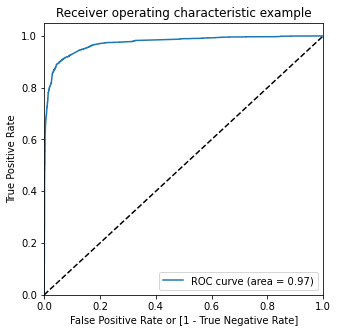

In [440]:
# Defining the function to plot the ROC curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None


draw_roc(Y_train_pred_final4.Converted, Y_train_pred_final4.Converted_Prob)
# AUC is 0.97 and the curve is far away from the 45 degree line indicating a good fit

In [441]:
# Precision and Recall Statistics 
from sklearn.metrics import precision_score,recall_score

In [442]:
Precision=float(TP/(TP+FP))
print(Precision)

0.9279624893435635


In [443]:
Recall=float(TP/(TP+FN))
print(Recall)

0.8828061638280617


Accuracy-92.92%
Sensitivity-88.28%
Specificity-95.77%
Precision-92.79%
Recall-88.28%

# Finding optimal probability threshold based on sensitivity-specificity trade off

In [444]:
# Finding optimal probability threshold based on sensitivity-specificity trade off
numbers=[float(x)/10 for x in range(10)]
for i in numbers:
    Y_train_pred_final4[i]=Y_train_pred_final4.Converted_Prob.map(lambda x:1 if x>i else 0)
Y_train_pred_final4.head(30)

,Converted,Converted_Prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
1871,0,0.009667,1871,0,1,0,0,0,0,0,0,0,0,0
6795,0,0.139416,6795,0,1,1,0,0,0,0,0,0,0,0
3516,0,0.013346,3516,0,1,0,0,0,0,0,0,0,0,0
8105,0,0.144684,8105,0,1,1,0,0,0,0,0,0,0,0
3934,0,0.049567,3934,0,1,0,0,0,0,0,0,0,0,0
4844,1,0.999374,4844,1,1,1,1,1,1,1,1,1,1,1
3297,0,0.002863,3297,0,1,0,0,0,0,0,0,0,0,0
8071,1,0.998194,8071,1,1,1,1,1,1,1,1,1,1,1
987,0,0.104845,987,0,1,1,0,0,0,0,0,0,0,0
7423,1,0.999405,7423,1,1,1,1,1,1,1,1,1,1,1


In [445]:
# Calculating accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame(columns = ['Probability','Accuracy','Sensitivity','Specificity'])
num = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm4 = metrics.confusion_matrix(Y_train_pred_final4.Converted, Y_train_pred_final4[i] )
    total4=sum(sum(cm4))
    Accuracy = (cm4[0,0]+cm4[1,1])/total4   
    Specificity = cm4[0,0]/(cm4[0,0]+cm4[0,1])
    Sensitivity = cm4[1,1]/(cm4[1,0]+cm4[1,1])
    cutoff_df.loc[i] =[ i ,Accuracy,Sensitivity,Specificity]
print(cutoff_df)

     Probability  Accuracy  Sensitivity  Specificity
0.1          0.1  0.853741     0.973642     0.779860
0.2          0.2  0.895795     0.948500     0.863318
0.3          0.3  0.923624     0.912814     0.930285
0.4          0.4  0.928262     0.899432     0.946027
0.5          0.5  0.929190     0.882806     0.957771
0.6          0.6  0.927025     0.859692     0.968516
0.7          0.7  0.913729     0.809408     0.978011
0.8          0.8  0.906772     0.778994     0.985507
0.9          0.9  0.887137     0.719384     0.990505


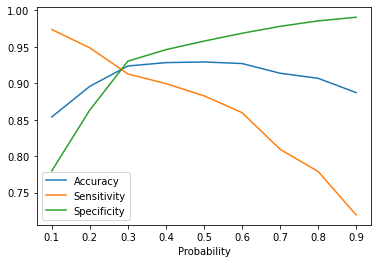

In [446]:
cutoff_df.plot.line(x='Probability', y=['Accuracy','Sensitivity','Specificity'])
plt.show()
# Optimal Probability threhold is at 0.3 where accuracy,sensitivity and specificity intersect

In [447]:
Y_train_pred_final4['final_Predicted'] = Y_train_pred_final4.Converted_Prob.map(lambda x: 1 if x > 0.3 else 0)
Y_train_pred_final4.head(20)

,Converted,Converted_Prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
1871,0,0.009667,1871,0,1,0,0,0,0,0,0,0,0,0,0
6795,0,0.139416,6795,0,1,1,0,0,0,0,0,0,0,0,0
3516,0,0.013346,3516,0,1,0,0,0,0,0,0,0,0,0,0
8105,0,0.144684,8105,0,1,1,0,0,0,0,0,0,0,0,0
3934,0,0.049567,3934,0,1,0,0,0,0,0,0,0,0,0,0
4844,1,0.999374,4844,1,1,1,1,1,1,1,1,1,1,1,1
3297,0,0.002863,3297,0,1,0,0,0,0,0,0,0,0,0,0
8071,1,0.998194,8071,1,1,1,1,1,1,1,1,1,1,1,1
987,0,0.104845,987,0,1,1,0,0,0,0,0,0,0,0,0
7423,1,0.999405,7423,1,1,1,1,1,1,1,1,1,1,1,1


In [448]:
Y_train_pred_final4['lead_score'] = Y_train_pred_final4.Converted_Prob.map(lambda x: round(x*100))
Y_train_pred_final4.head(20)

,Converted,Converted_Prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted,lead_score
1871,0,0.009667,1871,0,1,0,0,0,0,0,0,0,0,0,0,1
6795,0,0.139416,6795,0,1,1,0,0,0,0,0,0,0,0,0,14
3516,0,0.013346,3516,0,1,0,0,0,0,0,0,0,0,0,0,1
8105,0,0.144684,8105,0,1,1,0,0,0,0,0,0,0,0,0,14
3934,0,0.049567,3934,0,1,0,0,0,0,0,0,0,0,0,0,5
4844,1,0.999374,4844,1,1,1,1,1,1,1,1,1,1,1,1,100
3297,0,0.002863,3297,0,1,0,0,0,0,0,0,0,0,0,0,0
8071,1,0.998194,8071,1,1,1,1,1,1,1,1,1,1,1,1,100
987,0,0.104845,987,0,1,1,0,0,0,0,0,0,0,0,0,10
7423,1,0.999405,7423,1,1,1,1,1,1,1,1,1,1,1,1,100


In [449]:
# Calculating lead conversion rate at probability threshold of 0.3
checkingconvertedpredictions = Y_train_pred_final4.loc[Y_train_pred_final4['Converted']==1,['Converted','final_Predicted']]
checkingconvertedpredictions['final_Predicted'].value_counts()

1    2251
0     215
Name: final_Predicted, dtype: int64

In [450]:
# Calculating lead conversion rate at probability threshold of 0.3
float(2251/(2251+215))
# A lead conversion rate of 91.28% has been observed meeting the goal of 80% lead conversion.

0.9128142741281428

In [451]:
# Calculating confusion matrix for optimum probability cutoff
confusion5=metrics.confusion_matrix(Y_train_pred_final4.Converted,Y_train_pred_final4.final_Predicted)
print(confusion5)

[[3723  279]
 [ 215 2251]]


In [452]:
print(metrics.accuracy_score(Y_train_pred_final4.Converted,Y_train_pred_final4.final_Predicted))

0.9236239950525664


In [453]:
TP1 = confusion5[1,1] # true positive 
TN2 = confusion5[0,0] # true negatives
FP1 = confusion5[0,1] # false positives
FN2 = confusion5[1,0] # false negatives

In [454]:
Sensitivity1=float(TP1/(TP1+FN2))
print(Sensitivity1)

0.9128142741281428


In [455]:
Specificity1=float(TN2/(TN2+FP1))
print(Specificity1)

0.9302848575712144


In [456]:
Precision11=float(TP1/(TP1+FP1))
print(Precision11)
# precision at optimal probability threshold of 0.3 is 88.97%

0.8897233201581027


In [457]:
Recall11=float(TP1/(TP1+FN2))
print(Recall11)
# recall at optimal probability threshold of 0.3 is 91.28%

0.9128142741281428


# Optimal Probability Threshold using Precision and Recall Curve

In [460]:
# Precision Recall Curve
from sklearn.metrics import precision_recall_curve

In [461]:
Y_train_pred_final4.Converted,Y_train_pred_final4.predicted

(1871    0
 6795    0
 3516    0
 8105    0
 3934    0
        ..
 350     1
 79      1
 8039    1
 6936    0
 5640    0
 Name: Converted, Length: 6468, dtype: int64,
 1871    0
 6795    0
 3516    0
 8105    0
 3934    0
        ..
 350     1
 79      1
 8039    0
 6936    0
 5640    0
 Name: predicted, Length: 6468, dtype: int64)

In [462]:
Y_train_pred_final4.Converted,Y_train_pred_final4.predicted
Precision,Recall,Thresholds=precision_recall_curve(Y_train_pred_final4.Converted,Y_train_pred_final4.Converted_Prob)

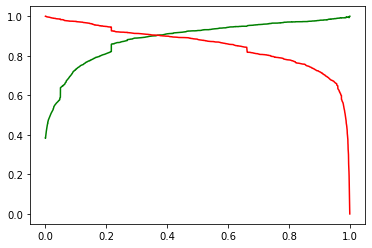

In [463]:
plt.plot(Thresholds,Precision[:-1],'g-')
plt.plot(Thresholds,Recall[:-1],'r-')
plt.show()
# Optimum probability threshold is 0.38 according to precision-recall curve

In [464]:
# Evaluating model at precision recall probability threshold
Y_train_pred_final4['finalpredicted1']=Y_train_pred_final4.Converted_Prob.map(lambda x:1 if x>0.38 else 0)
Y_train_pred_final4.head()

,Converted,Converted_Prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted,lead_score,finalpredicted1
1871,0,0.009667,1871,0,1,0,0,0,0,0,0,0,0,0,0,1,0
6795,0,0.139416,6795,0,1,1,0,0,0,0,0,0,0,0,0,14,0
3516,0,0.013346,3516,0,1,0,0,0,0,0,0,0,0,0,0,1,0
8105,0,0.144684,8105,0,1,1,0,0,0,0,0,0,0,0,0,14,0
3934,0,0.049567,3934,0,1,0,0,0,0,0,0,0,0,0,0,5,0


In [465]:
confusion7=metrics.confusion_matrix(Y_train_pred_final4.Converted,Y_train_pred_final4.finalpredicted1)
print(confusion7)

[[3769  233]
 [ 243 2223]]


In [466]:
TP7 = confusion7[1,1] # true positive 
TN7 = confusion7[0,0] # true negatives
FP7 = confusion7[0,1] # false positives
FN7 = confusion7[1,0] # false negatives

In [467]:
print(metrics.accuracy_score(Y_train_pred_final4.Converted,Y_train_pred_final4.finalpredicted1))

0.9264069264069265


In [468]:
Sensitivity7=float(TP7/(TP7+FN7))
print(Sensitivity7)

0.9014598540145985


In [469]:
Specificity7=float(TN7/(TN7+FP7))
print(Specificity7)

0.9417791104447776


In [470]:
precision_score(Y_train_pred_final4.Converted,Y_train_pred_final4.finalpredicted1)

0.9051302931596091

In [471]:
recall_score(Y_train_pred_final4.Converted,Y_train_pred_final4.finalpredicted1)

0.9014598540145985

In [472]:
# Considering the sensitivity, specificity trade off probability cutoff of 0.3. Testing the model on test dataset

# Evaluating Model on the Test Set

In [473]:
X_test[num_vars]=scaler.transform(X_test[num_vars])
X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,LeadOrigin_Landing Page Submission,LeadOrigin_Lead Add Form,LeadOrigin_Lead Import,LeadOrigin_Quick Add Form,LeadSource_Direct Traffic,LeadSource_Facebook,LeadSource_Google,...,AfreecopyofMasteringTheInterview_Yes,LastNotableActivity_Email Link Clicked,LastNotableActivity_Email Opened,LastNotableActivity_Modified,LastNotableActivity_Olark Chat Conversation,LastNotableActivity_Others,LastNotableActivity_Page Visited on Website,LastNotableActivity_SMS Sent,LastNotableActivity_Unreachable,LastNotableActivity_Unsubscribed
4269,0.031873,0.444982,0.145455,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2376,0.000000,0.000000,0.000000,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
7766,0.019920,0.025968,0.090909,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
9199,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4359,0.000000,0.000000,0.000000,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [474]:
col=X_train_rfe5.columns

In [475]:
print(col)

Index(['TotalVisits', 'Total Time Spent on Website',
       'LeadOrigin_Landing Page Submission', 'LeadOrigin_Lead Add Form',
       'LeadSource_Olark Chat', 'LeadSource_Welingak Website',
       'DoNotEmail_Yes', 'LastActivity_Page Visited on Website',
       'LastActivity_SMS Sent',
       'Whatisyourcurrentoccupation_Working Professional',
       'Tags1_Closed by Horizzon', 'Tags1_Interested in other courses',
       'Tags1_Lost to EINS', 'Tags1_Not Specified', 'Tags1_Other_Tags',
       'Tags1_Ringing', 'Tags1_Will revert after reading the email',
       'LastNotableActivity_Email Link Clicked',
       'LastNotableActivity_Modified',
       'LastNotableActivity_Olark Chat Conversation'],
      dtype='object')


In [476]:
X_test_rfe5=X_test[col]

In [477]:
X_test_rfe6=sm.add_constant(X_test_rfe5)

In [478]:
Y_test_pred4=res.predict(X_test_rfe6)

In [479]:
Y_Pred_1=pd.DataFrame(Y_test_pred4)

In [480]:
Y_test_df=pd.DataFrame(Y_test)

In [481]:
Y_test_df['Prospect ID']=Y_test_df.index

In [482]:
Y_Pred_1.reset_index(drop=True,inplace=True)
Y_test_df.reset_index(drop=True,inplace=True)

In [483]:
Y_test_Pred_final=pd.concat([Y_test_df,Y_Pred_1],axis=1)

In [484]:
Y_test_Pred_final.head()

,Converted,Prospect ID,0
0,1,4269,0.883556
1,1,2376,0.996016
2,1,7766,0.970895
3,0,9199,0.005319
4,1,4359,0.972535


In [485]:
Y_test_Pred_final=Y_test_Pred_final.rename(columns={0:'Converted_Prob'})

In [486]:
Y_test_Pred_final.head()

,Converted,Prospect ID,Converted_Prob
0,1,4269,0.883556
1,1,2376,0.996016
2,1,7766,0.970895
3,0,9199,0.005319
4,1,4359,0.972535


In [487]:
Y_test_Pred_final['finalpredicted']=Y_test_Pred_final.Converted_Prob.map(lambda x:1 if x>0.3 else 0)

In [488]:
Y_test_Pred_final.head()

,Converted,Prospect ID,Converted_Prob,finalpredicted
0,1,4269,0.883556,1
1,1,2376,0.996016,1
2,1,7766,0.970895,1
3,0,9199,0.005319,0
4,1,4359,0.972535,1


In [489]:
Y_test_Pred_final['leadscore'] = Y_test_Pred_final.Converted_Prob.map(lambda x: round(x*100))
Y_test_Pred_final.head(20)

,Converted,Prospect ID,Converted_Prob,finalpredicted,leadscore
0,1,4269,0.883556,1,88
1,1,2376,0.996016,1,100
2,1,7766,0.970895,1,97
3,0,9199,0.005319,0,1
4,1,4359,0.972535,1,97
5,1,9186,0.992598,1,99
6,1,1631,0.975393,1,98
7,1,8963,0.953248,1,95
8,0,8007,0.022181,0,2
9,1,5324,0.981408,1,98


In [490]:
# Checking Lead Score Conversion Rate on Test DataSet
checkingtestconvertedprediction = Y_test_Pred_final.loc[Y_test_Pred_final['Converted']==1,['Converted','finalpredicted']]
checkingtestconvertedprediction['finalpredicted'].value_counts()

1    1016
0      79
Name: finalpredicted, dtype: int64

In [491]:
float(1016/(1016+79))
# lead score conversion rate of 92.79% meeting the goal of 80% lead conversion rate

0.9278538812785389

In [492]:
confusion10=metrics.confusion_matrix(Y_test_Pred_final.Converted,Y_test_Pred_final.finalpredicted)
print(confusion10)

[[1549  128]
 [  79 1016]]


In [493]:
# Accuracy
print(metrics.accuracy_score(Y_test_Pred_final.Converted,Y_test_Pred_final.finalpredicted))

0.9253246753246753


In [494]:
TP10 = confusion10[1,1] # true positive 
TN10 = confusion10[0,0] # true negatives
FP10 = confusion10[0,1] # false positives
FN10 = confusion10[1,0] # false negatives

In [495]:
#Sensitivity
Sensitivity10=float(TP10/(TP10+FN10))
print(Sensitivity10)

0.9278538812785389


In [496]:
#Specificity
Specificity10=float(TN10/(TN10+FP10))
print(Specificity10)

0.9236732259988074


In [497]:
print('Precision ',precision_score(Y_test_Pred_final.Converted,Y_test_Pred_final.finalpredicted))
print('Recall ',recall_score(Y_test_Pred_final.Converted,Y_test_Pred_final.finalpredicted))

Precision  0.8881118881118881
Recall  0.9278538812785389


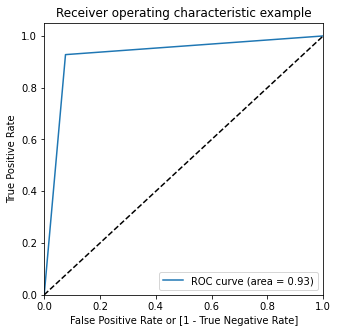

In [498]:
# ROC Curve for test dataset AUC 0.93 away from 45 degree diagonal
draw_roc(Y_test_Pred_final.Converted,Y_test_Pred_final.finalpredicted)

Model Evaluation(Sensitivity-Specificity Trade Off Optimal Probability 0.3)-Train Set
            
            AUC of ROC-0.97
            Accuracy-92.36%
            Sensitivity-91.28%
            Specificity-93.03%
            Precision-88.97%
            Recall-91.28%
            Lead Conversion Rate-91.28%
Model Evaluation(Sensitivity-Specificity Trade Off Optimal Probability 0.3)-Test Set
            
            AUC of ROC-0.93
            Accuracy-92.53
            Sensitivity-92.79%
            Specificity-92.37%
            Precision-88.81%
            Recall-92.79%
            Lead Conversion Rate-92.79%

# Conclusions and Implications from the Model
Final Regression Equation
ln(p/(1-p))= (-1.4387) + 6.2833*TotalVisits + 4.3093*Total Time Spent on Website + (-0.7983)*LeadOrigin_Landing Page Submission + 1.1354*LeadOrigin_Lead Add Form + 0.7618*LeadSource_Olark Chat + 4.0108*LeadSource_Welingak Website + (-0.6762)*DoNotEmail_Yes + (-0.6028)*LastActivity_Page Visited on Website + 1.9544*LastActivity_SMS Sent + 0.8386*Whatisyourcurrentoccupation_Working Professional + 6.7275*Tags1_Closed by Horizzon +(-2.4854)*Tags1_Interested in other courses + 5.6726*Tags1_Lost to ENIS + (-0.6070)*Tags1_Not Specified+ (-2.846)*Tags1_Other Tags + (-3.9524)*Tags1_Ringing + 3.8703*Tags1_Will Revert after reading the email +(-1.3266)* LastNotableActivity_Email Link Clinked + (-1.6697)* LastNotableActivity_Modified +(-1.7145)*LastNotableActivity_Olark Chat Conversation


The top three variables which contribute most towards the probability of a lead getting converted include:
                
                Closed by Horizzon (from Tags) (coefficient 6.7275)
                Total Visits (coefficient 6.2833)
                Lost to ENIS (from Tags) (coefficient 5.6726)
The top three categorical/dummy variables which contribute most towards the probability of a lead getting converted include:
                
                Closed by Horizzon (from Tags) (coefficient 6.7275)
                Lost to ENIS (from Tags) (coefficient 5.6726)
                Welingak Website (from Lead Source) (coefficient 4.010)

Other important variables consist of Tags(Ringing),Tags(Will revert after reading the mail),Tags(Interested in other courses),Last Activity(SMS Sent),Lead Origin(Lead Add Form),Lead Source(Olark Chat),Occupation(Working Professional),Last Activity(SMS Sent),Last Notable Activity(Olark Chat Conversation)
